In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mat_img

In [2]:
def PSNR(im1, im2):
    R2 = np.amax(im1)**2
    MSE = np.sum(np.power(np.subtract(im1, im2), 2))
    MSE /= (im1.size[0] * im1.size[1])
    PSNR = 10 * np.log10(R2/MSE)
    return PSNR

In [3]:
img_color = Image.open(r"lena.jpg")
img_grey = img_color.convert('L')
img_color.show()
img_grey.show()

img_grey.save('Create\Grey.png', 'PNG')
orig_grey = Image.open(r"Create\\Grey.png")

org_width, org_height = img_grey.size
print(f"Original size = {org_width} x {org_height}")

Original size = 512 x 512


In [4]:
resized_grey = img_grey.resize((round(img_grey.size[0] * 0.5), round(img_grey.size[1] * 0.5)))
resized_grey.show()
width, height = resized_grey.size
print(f"Halved size = {width} x {height}")

Halved size = 256 x 256


In [5]:
resized_grey_nearest = resized_grey.resize((org_width, org_height), Image.Resampling.NEAREST)
resized_grey_nearest.show()
width, height = resized_grey_nearest.size
print(f"New size = {width} x {height}")

resized_grey_nearest.save('Create\Modified_Nearest.png', 'PNG')
enhanced = Image.open(r"Create\\Modified_Nearest.png")
psnr_nearest = PSNR(orig_grey, enhanced)
print(psnr_nearest)

New size = 512 x 512
32.95655212474345


In [6]:
resized_grey_bilinear = resized_grey.resize((org_width, org_height), Image.Resampling.BILINEAR)
resized_grey_bilinear.show()
width, height = resized_grey_bilinear.size
print(f"New size = {width} x {height}")

resized_grey_bilinear.save('Create\Modified_Bilinear.png', 'PNG')
enhanced = Image.open(r"Create\\Modified_Bilinear.png")
psnr_bilinear = PSNR(orig_grey, enhanced)
print(psnr_bilinear)

New size = 512 x 512
33.24064249853261


In [7]:
resized_grey_bicubic = resized_grey.resize((org_width, org_height), Image.Resampling.BICUBIC)
resized_grey_bicubic.show()
width, height = resized_grey_bicubic.size
print(f"New size = {width} x {height}")

resized_grey_bicubic.save('Create\Modified_Bicubic.png', 'PNG')
enhanced = Image.open(r"Create\\Modified_Bicubic.png")
psnr_bicubic = PSNR(orig_grey, enhanced)
print(psnr_bicubic)

New size = 512 x 512
33.87628276992553


In [8]:
resized_grey_lanczos = resized_grey.resize((org_width, org_height), Image.Resampling.LANCZOS)
resized_grey_lanczos.show()
width, height = resized_grey_lanczos.size
print(f"New size = {width} x {height}")

resized_grey_lanczos.save('Create\Modified_Lanczos.png', 'PNG')
enhanced = Image.open(r"Create\\Modified_Lanczos.png")
psnr_lanczos = PSNR(orig_grey, enhanced)
print(psnr_lanczos)

New size = 512 x 512
34.10309924501837


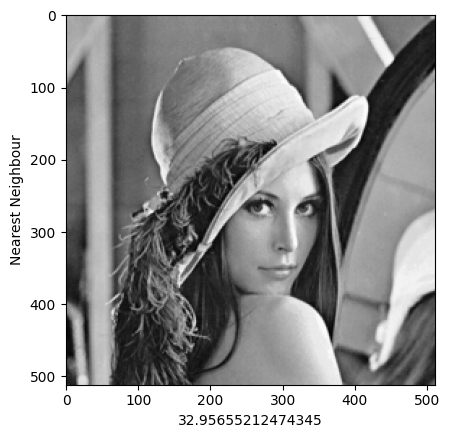

In [9]:
plt_nearest = mat_img.imread('Create\Modified_Nearest.png')
plt.xlabel(psnr_nearest)
plt.ylabel("Nearest Neighbour")
plt.imshow(plt_nearest,cmap='gray')

Text(0, 0.5, 'Bilinear')

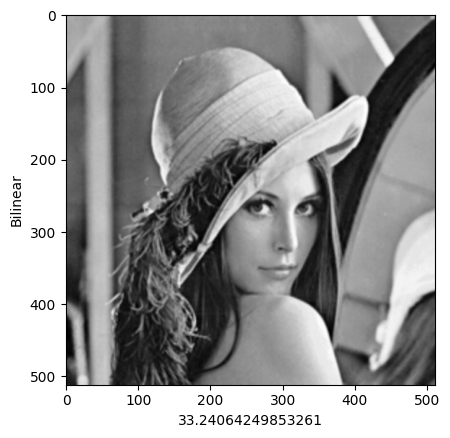

In [10]:
plt_bilinear = mat_img.imread('Create\Modified_Bilinear.png')
plt.imshow(plt_bilinear,cmap='gray')
plt.xlabel(psnr_bilinear)
plt.ylabel("Bilinear")

Text(0, 0.5, 'Bicubic')

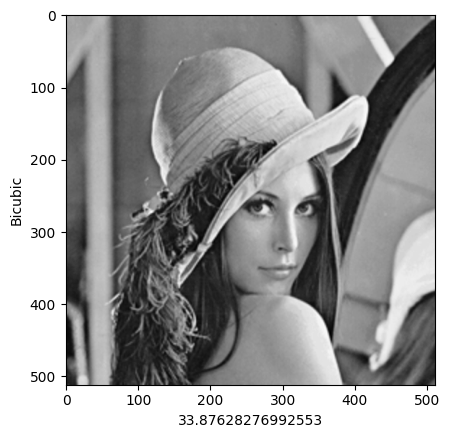

In [11]:
plt_bicubic = mat_img.imread('Create\Modified_Bicubic.png')
plt.imshow(plt_bicubic,cmap='gray')
plt.xlabel(psnr_bicubic)
plt.ylabel("Bicubic")

Text(0, 0.5, 'Lanczos')

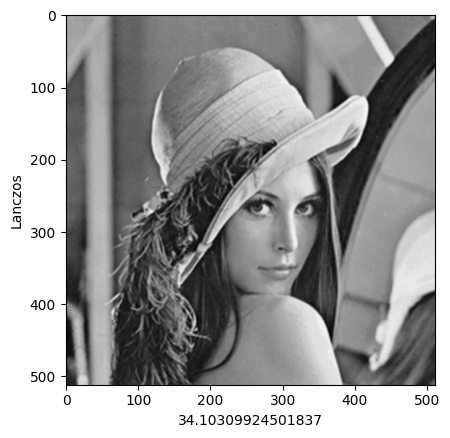

In [12]:
plt_lanczos = mat_img.imread('Create\Modified_Lanczos.png')
plt.imshow(plt_lanczos,cmap='gray')
plt.xlabel(psnr_lanczos)
plt.ylabel("Lanczos")